# **CSCI 6505 - PROJECT: MUSIC MOODS CLASSIFICATION**

**Group Number:** 12 \
**Group Name:** Music Moods Classification \
**Team Members:** 

1.   Tanvi Paruthi - B00875949
2.   Tasnim Khan - B00882598
3.   Nikita Kothari - B00893710
4.   Naga Pavan Srivathsav Chevuru – B00893685

## **Brief Overview and Motivation**

The dataset for our project "Songs mood Classification" is extracted from Spotify using Spotify public APIs. This labelled dataset will be our ground truth. The explanation of each audio features have been referred from Spotify Webpage and have also been listed at the end of this notebook for reference.

We were surprised to see the Spotify Developer's API and the work that is has done in music, and all of us wanted to explore the numerous playlists and test the models that we have learnt in CSCI 6505 course. This was our motivation for our Machine Learning Project.

We have performed the exploratory analysis on the dataset and plotted different visualisation for understanding the correlation between the datasets and understand the patterns on how they classify into moods.


## **Library Imports**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics, ensemble, tree, model_selection
from sklearn import pipeline, manifold, preprocessing, feature_selection, decomposition
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
#from sklearn.learning_curve import learning_curve
#from sklearn.cross_validation import cross_val_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

## **Loading & Analyzing Dataset**

### **Mount Drive and read dataset**

In [7]:
# Mount the drive
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [11]:
# Read the dataset
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Project_6505/spotify_output_dataset.csv")

### **Data Exploration and Cleaning**

In [12]:
# Print columns and count of records
print("Total number of records: ",df.count(axis=0))

Total number of records:  uri                 4005
danceability        4005
energy              4005
key                 4005
loudness            4005
speechiness         4005
acousticness        4005
instrumentalness    4005
liveness            4005
valence             4005
tempo               4005
label               4005
dtype: int64


In [13]:
# Unique Classes/Labels
print("Total number of unique moods in the dataset: ",df.label.unique())

Total number of unique moods in the dataset:  ['aggressive' 'calm' 'chill' 'dark' 'energetic' 'relaxing' 'happy' 'sad']


In [14]:
# Datasets count per label
print(df.groupby('label').size())

label
aggressive    569
calm          891
chill         160
dark          676
energetic     299
happy         487
relaxing      471
sad           452
dtype: int64


In [15]:
df

,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
0,spotify:track:5NqQXBoJUEBVJUV57wiqim,0.805,0.927,9,-2.339,0.2370,0.03050,0.000000,0.3570,0.746,94.961,aggressive
1,spotify:track:422lAAWQO9TqL1LxIPdhOn,0.603,0.783,9,-6.891,0.1380,0.00353,0.000000,0.2160,0.182,87.154,aggressive
2,spotify:track:4xkOaSrkexMciUUogZKVTS,0.548,0.847,1,-3.237,0.1860,0.06220,0.000000,0.0816,0.100,171.447,aggressive
3,spotify:track:4WVPpEGS7FX6TVkV0pHskN,0.637,0.737,11,-2.875,0.1850,0.13300,0.000000,0.3400,0.101,90.521,aggressive
4,spotify:track:1ckva68ysL3kpDRkZII6vK,0.699,0.771,6,-7.610,0.0424,0.01280,0.000407,0.1900,0.834,154.998,aggressive
...,...,...,...,...,...,...,...,...,...,...,...,...
4000,spotify:track:27iC5AhQxPcLlIwnbJ4E6S,0.853,0.340,10,-8.151,0.0615,0.35100,0.000000,0.0574,0.334,115.010,sad
4001,spotify:track:7u7m3UXECiGrfOhha2qrkd,0.621,0.115,10,-15.097,0.0513,0.96900,0.000006,0.1750,0.253,129.689,sad
4002,spotify:track:2V0tn44odsaXv6LJWIFGaS,0.782,0.294,5,-12.697,0.0399,0.44800,0.000000,0.0806,0.411,131.985,sad
4003,spotify:track:5sF7hdYvhrcgNq8NZjfK8L,0.405,0.111,0,-11.879,0.0369,0.96400,0.000044,0.0872,0.219,116.860,sad


In [16]:
df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.000000,4005.00000
mean,0.537917,0.499457,4.939326,-10.813419,0.078810,0.441777,0.222479,0.168363,0.361328,115.89717
std,0.187583,0.289924,3.572366,7.727954,0.085169,0.377772,0.369324,0.138799,0.243642,30.44412
min,0.000000,0.000735,0.000000,-40.420000,0.000000,0.000005,0.000000,0.021500,0.000000,0.00000
25%,0.418000,0.262000,2.000000,-13.037000,0.035200,0.058300,0.000000,0.096100,0.161000,93.03300
50%,0.560000,0.520000,5.000000,-8.284000,0.045500,0.352000,0.000106,0.112000,0.323000,116.38500
75%,0.674000,0.753000,8.000000,-5.594000,0.075900,0.847000,0.365000,0.176000,0.524000,134.97700
max,0.973000,0.999000,11.000000,2.363000,0.817000,0.996000,0.996000,0.976000,0.979000,211.86300


In [17]:
# Dropping unwanted columns
# Removing duplicate URI's
cleaned_df = df.drop(['uri'], axis=1)

# Dropping duplicates
cleaned_df = cleaned_df.drop_duplicates()
print("Total number of records: ",cleaned_df.count(axis=0))

Total number of records:  danceability        3859
energy              3859
key                 3859
loudness            3859
speechiness         3859
acousticness        3859
instrumentalness    3859
liveness            3859
valence             3859
tempo               3859
label               3859
dtype: int64


### **Data Visualization: Identifying correlation between all the features**

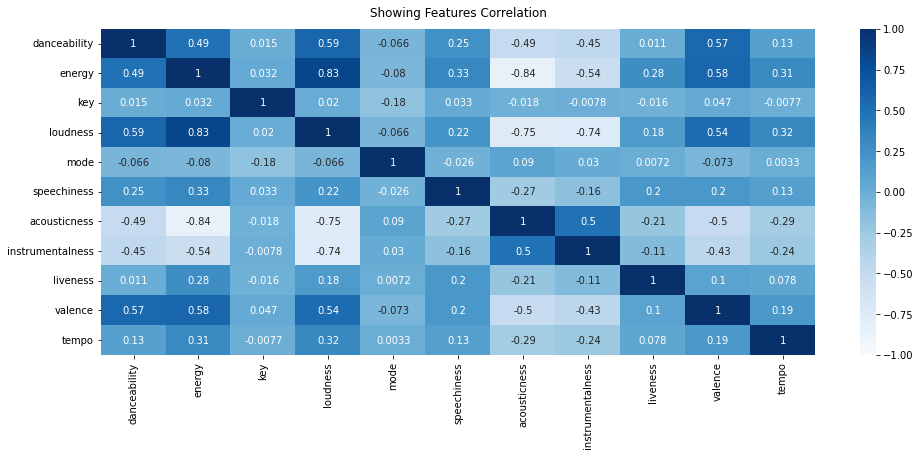

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cleaned_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Showing Features Correlation', fontdict={'fontsize':12}, pad=12)
plt.show()

**Insights from the heatmap:**

1. The features which are highly correlated to danceability are: energy, loudness, valence.
2. The features which are highly correlated to energy are: valence, loudness, danceability.
3. The features which are highly correlated to key are: None
4. The features which are highly correlated to loudness are: valence, energy.
5. The features which are highly correlated to mode: None
6. The features which are highly correlated to acousticness are: instrumentalness.

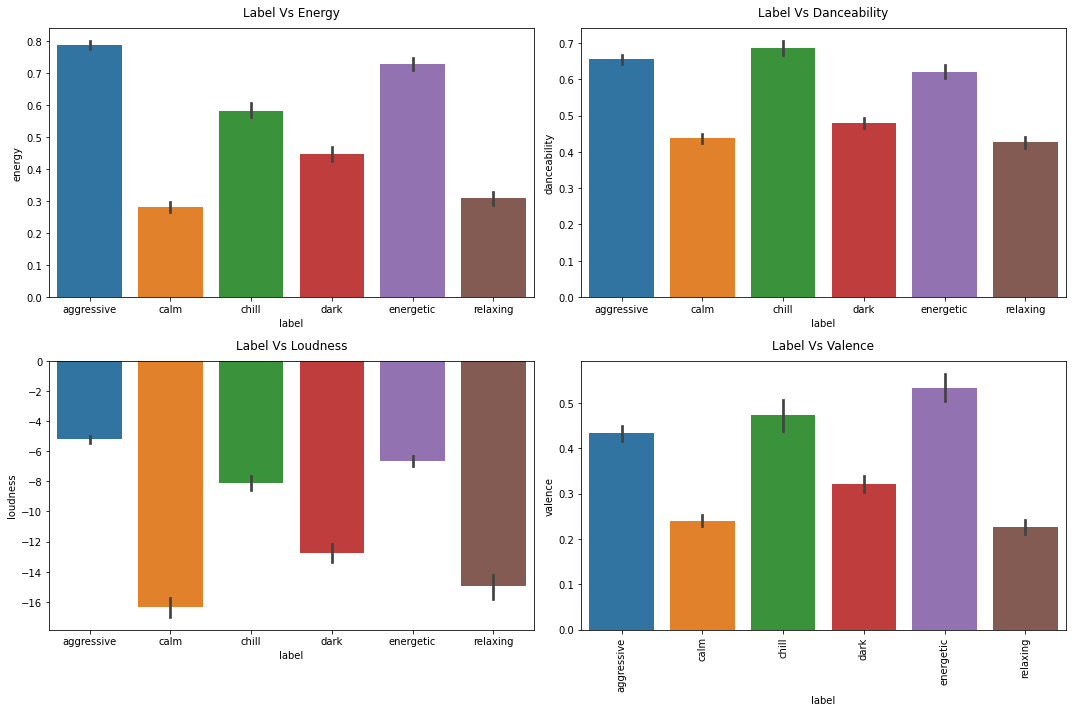

In [ ]:
# Bar plots for highly correlated features

fig, ax = plt.subplots(2,2,figsize=(15,10))
map1 = sns.barplot(x = 'label', y = 'energy', data = cleaned_df, ax=ax[0][0])
map1.set_title('Label Vs Energy', fontdict={'fontsize':12}, pad=12)
map2 = sns.barplot(x = 'label', y = 'danceability', data = cleaned_df, ax=ax[0][1])
map2.set_title('Label Vs Danceability', fontdict={'fontsize':12}, pad=12)
map3 = sns.barplot(x = 'label', y = 'loudness', data = cleaned_df, ax=ax[1][0])
map3.set_title('Label Vs Loudness', fontdict={'fontsize':12}, pad=12)
map4 = sns.barplot(x = 'label', y = 'valence', data = cleaned_df, ax=ax[1][1])
map4.set_title('Label Vs Valence', fontdict={'fontsize':12}, pad=12)
plt.xticks(rotation=90)

fig.tight_layout()

In [ ]:
# Extracting a samaller chunk of this dataset - 50 records for each label
small_df = cleaned_df.groupby('label').head(50).reset_index(drop=True)
print(small_df.groupby('label').size())

label
aggressive    50
calm          50
chill         50
dark          50
energetic     50
relaxing      50
dtype: int64


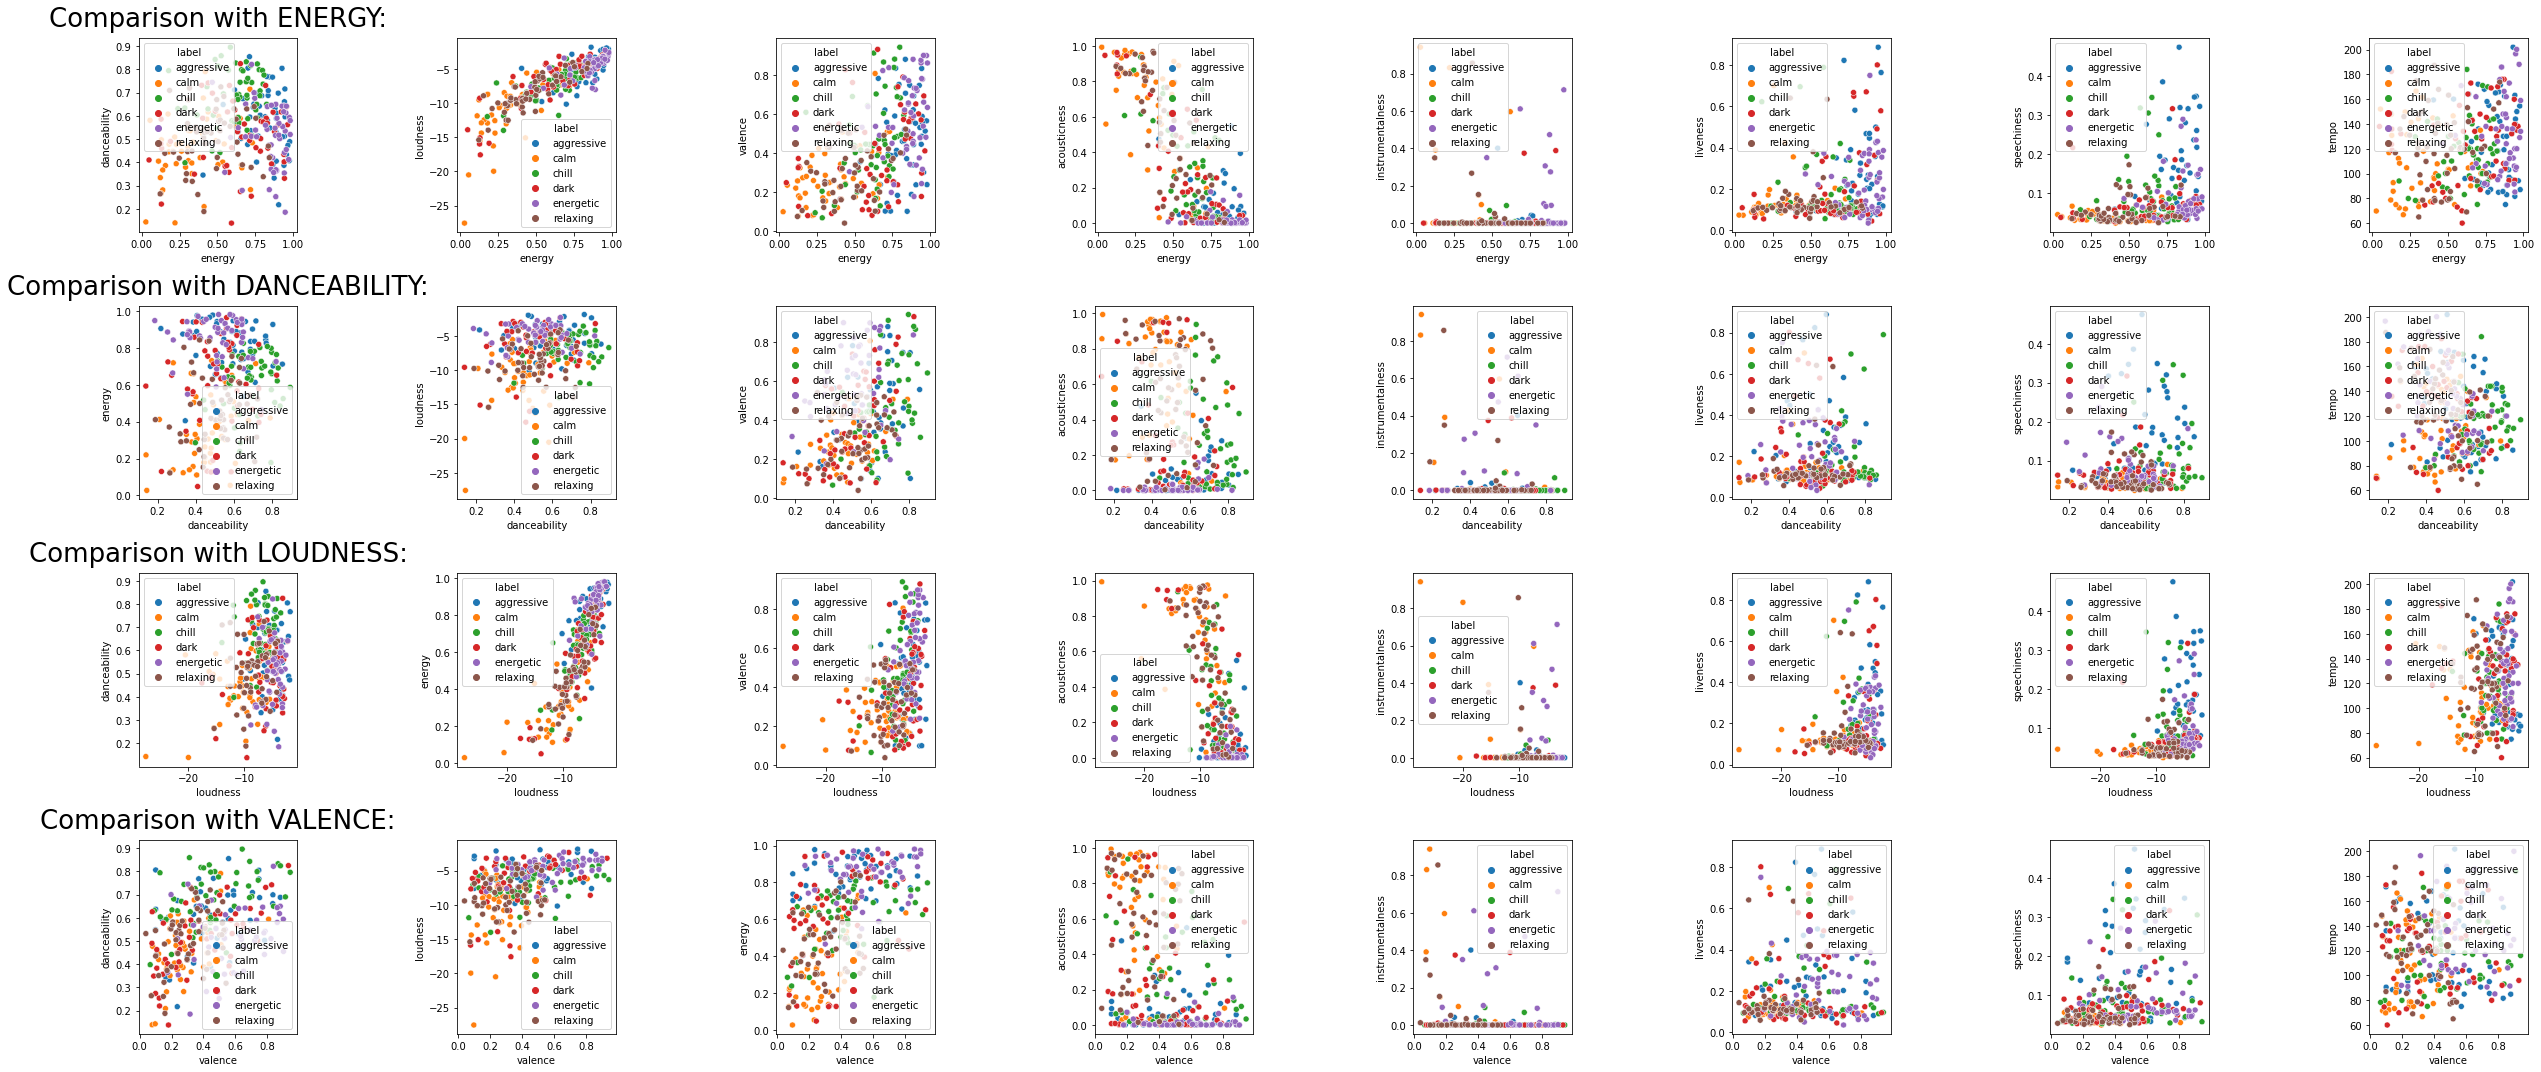

In [ ]:
# plot
fig, ax = plt.subplots(4,8,figsize=(35,15))
g = sns.scatterplot(y="danceability", x="energy", hue="label", data=small_df, ax=ax[0][0])
g.set_title('Comparison with ENERGY:', fontdict={'fontsize':26}, pad=12)
g = sns.scatterplot(y="loudness", x="energy", hue="label", data=small_df, ax=ax[0][1])
g = sns.scatterplot(y="valence", x="energy", hue="label", data=small_df, ax=ax[0][2])
g = sns.scatterplot(y="acousticness", x="energy", hue="label", data=small_df, ax=ax[0][3])
g = sns.scatterplot(y="instrumentalness", x="energy", hue="label", data=small_df, ax=ax[0][4])
g = sns.scatterplot(y="liveness", x="energy", hue="label", data=small_df, ax=ax[0][5])
g = sns.scatterplot(y="speechiness", x="energy", hue="label", data=small_df, ax=ax[0][6])
g = sns.scatterplot(y="tempo", x="energy", hue="label", data=small_df, ax=ax[0][7])


g = sns.scatterplot(y="energy", x="danceability", hue="label", data=small_df, ax=ax[1][0])
g.set_title('Comparison with DANCEABILITY:', fontdict={'fontsize':26}, pad=12)
g = sns.scatterplot(y="loudness", x="danceability", hue="label", data=small_df, ax=ax[1][1])
g = sns.scatterplot(y="valence", x="danceability", hue="label", data=small_df, ax=ax[1][2])
g = sns.scatterplot(y="acousticness", x="danceability", hue="label", data=small_df, ax=ax[1][3])
g = sns.scatterplot(y="instrumentalness", x="danceability", hue="label", data=small_df, ax=ax[1][4])
g = sns.scatterplot(y="liveness", x="danceability", hue="label", data=small_df, ax=ax[1][5])
g = sns.scatterplot(y="speechiness", x="danceability", hue="label", data=small_df, ax=ax[1][6])
g = sns.scatterplot(y="tempo", x="danceability", hue="label", data=small_df, ax=ax[1][7])

g = sns.scatterplot(y="danceability", x="loudness", hue="label", data=small_df, ax=ax[2][0])
g.set_title('Comparison with LOUDNESS:', fontdict={'fontsize':26}, pad=12)
g = sns.scatterplot(y="energy", x="loudness", hue="label", data=small_df, ax=ax[2][1])
g = sns.scatterplot(y="valence", x="loudness", hue="label", data=small_df, ax=ax[2][2])
g = sns.scatterplot(y="acousticness", x="loudness", hue="label", data=small_df, ax=ax[2][3])
g = sns.scatterplot(y="instrumentalness", x="loudness", hue="label", data=small_df, ax=ax[2][4])
g = sns.scatterplot(y="liveness", x="loudness", hue="label", data=small_df, ax=ax[2][5])
g = sns.scatterplot(y="speechiness", x="loudness", hue="label", data=small_df, ax=ax[2][6])
g = sns.scatterplot(y="tempo", x="loudness", hue="label", data=small_df, ax=ax[2][7])

g = sns.scatterplot(y="danceability", x="valence", hue="label", data=small_df, ax=ax[3][0])
g.set_title('Comparison with VALENCE:', fontdict={'fontsize':26}, pad=12)
g = sns.scatterplot(y="loudness", x="valence", hue="label", data=small_df, ax=ax[3][1])
g = sns.scatterplot(y="energy", x="valence", hue="label", data=small_df, ax=ax[3][2])
g = sns.scatterplot(y="acousticness", x="valence", hue="label", data=small_df, ax=ax[3][3])
g = sns.scatterplot(y="instrumentalness", x="valence", hue="label", data=small_df, ax=ax[3][4])
g = sns.scatterplot(y="liveness", x="valence", hue="label", data=small_df, ax=ax[3][5])
g = sns.scatterplot(y="speechiness", x="valence", hue="label", data=small_df, ax=ax[3][6])
g = sns.scatterplot(y="tempo", x="valence", hue="label", data=small_df, ax=ax[3][7])

fig.tight_layout()

**Insights:**

From the above scatter plots, below are the list of observations that we were able to identify -

1. Instrumentalness is 0 almost for all songs and hence this feature can be dropped out.
2. Valence is spread out.
3. Danceability for most of the sad and happy songs lie between 0.45 to 0.75
4. Most songs are low on liveness and speechiness

## **Features and Labelled Dataset**

In [40]:
# Extracting Features and labels dataset

audio_features = cleaned_df.iloc[:, 0:-1]
audio_labels = cleaned_df.iloc[:, -1]

In [41]:
# Datasets count per label
print(df.groupby('label').size())

label
aggressive    569
calm          891
chill         160
dark          676
energetic     299
happy         487
relaxing      471
sad           452
dtype: int64


## **SMOTE for Classification**

Since we see unbalanced datasets, the model will have hard time learning the decision boundaries between the classes. Hence, we are using SMOTE to balance the records across the labels. We are using imbalanced-learn Python library that provides different implementations of approaches to deal with imbalanced datasets. \

Smote will perform below steps: \
1) selecting a random example from the minority class \
2) finding the k (typically k=5) nearest neighbors of that example \
3) selecting a random example from those neighbors \
4) drawing a line between those two examples \
5) generating a synthetic example by choosing a random point from that line

Drawback of SMOTE: It doesnot have any knowledge regarding the underlying distribution. Therefore, some noisy samples can be generated. As a result, we concluded that we would be using other sampler that imbalanced-learn provides. Out of the two samplers, SMOTETomek and SMOTEENN, we chose to proceed ahead by using SMOTETomek.

In [42]:
from imblearn.combine import SMOTETomek
from collections import Counter
# Apply SMOTEENN to balance the dataset
smk = SMOTETomek()
X_res,y_res=smk.fit_resample(audio_features, audio_labels)

# New count after balancing -> {0: 900, 1: 895}
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({'chill': 783, 'aggressive': 763, 'energetic': 757, 'sad': 752, 'happy': 750, 'relaxing': 723, 'dark': 667, 'calm': 665})


## **Initial Model Run**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(audio_features, audio_labels, test_size=0.3)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3)

### **Model Definitions**

In [44]:
# MODEL DEFINITIONS

def KNearnestNeighboursGRIDSearch(X,y):
    KNN=KNeighborsClassifier()

    parameters = {'n_neighbors': range(1, 20)}
    grid_searcher_knn = model_selection.GridSearchCV(KNN, parameters)
    grid_searcher_knn.fit(X, y)
    return grid_searcher_knn.best_params_['n_neighbors']

def LogRegression(X_train, X_test, y_train, y_test):
    LogReg=LogisticRegression(random_state=0)

    LogReg.fit(X_train,y_train)
    accuracy = metrics.accuracy_score(y_test, LogReg.predict(X_test))
    print("Logistic Regression Accuracy Score: ",accuracy)
    
    confuse = metrics.confusion_matrix(y_test, LogReg.predict(X_test))
    print(confuse)
    print(metrics.classification_report(y_test, LogReg.predict(X_test)))

    sns.heatmap(confuse)
    plt.show()
    
def KNN(X_train, X_test, y_train, y_test,n_neighbors):
    KNN=KNeighborsClassifier(n_neighbors = n_neighbors)

    KNN.fit(X_train, y_train)
    accuracy = metrics.accuracy_score(y_test, KNN.predict(X_test))
    print("KNN Accuracy Score: ", accuracy)
    
    confuse = metrics.confusion_matrix(y_test, KNN.predict(X_test))
    print(confuse)
    print(metrics.classification_report(y_test, KNN.predict(X_test)))

    sns.heatmap(confuse)
    plt.show()
    
def GaussNB(X_train, X_test, y_train, y_test):
    GNB=GaussianNB()

    GNB.fit(X_train, y_train)
    accuracy = metrics.accuracy_score(y_test, GNB.predict(X_test))
    print("Gaussian NB Accuracy Score: ", accuracy)
    
    confuse = metrics.confusion_matrix(y_test, GNB.predict(X_test))
    print(confuse)
    print(metrics.classification_report(y_test, GNB.predict(X_test)))

    sns.heatmap(confuse)
    plt.show()
    
def SupportVectorClassifier(X_train, X_test, y_train, y_test):
    SVM=SVC()

    SVM.fit(X_train, y_train)
    accuracy = metrics.accuracy_score(y_test, SVM.predict(X_test))
    print("Support Vector Classifier Accuracy Score: ", accuracy)
    
    confuse = metrics.confusion_matrix(y_test, SVM.predict(X_test))
    print(confuse)
    print(metrics.classification_report(y_test, SVM.predict(X_test)))

    sns.heatmap(confuse)
    plt.show()
    
def DecisionTree(X_train, X_test, y_train, y_test):
    DTC = DecisionTreeClassifier()

    DTC.fit(X_train, y_train)
    accuracy = metrics.accuracy_score(y_test, DTC.predict(X_test))
    print("Decision Tree Classifier Accuracy Score: ", accuracy)
    
    confuse = metrics.confusion_matrix(y_test, DTC.predict(X_test))
    print(confuse)
    print(metrics.classification_report(y_test, DTC.predict(X_test)))

    sns.heatmap(confuse)
    plt.show()
    
def RandomForest(X_train, X_test, y_train, y_test):
    RFC = RandomForestClassifier()

    RFC.fit(X_train, y_train)
    accuracy = metrics.accuracy_score(y_test, RFC.predict(X_test))
    print("Random Forest Classifier Accuracy Score: ", accuracy)
    
    confuse = metrics.confusion_matrix(y_test, RFC.predict(X_test))
    print(confuse)
    print(metrics.classification_report(y_test, RFC.predict(X_test)))

    sns.heatmap(confuse)
    plt.show()
    

### **Running Models - Before ReSampling (i.e. w/o SMOTE)**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Logistic Regression Accuracy Score:  0.35578583765112265
[[118   8   0  35   0  11   0   0]
 [ 15 173   0  31   0   9  14  23]
 [  9   5   0  15   0   6   0   6]
 [ 59  75   0  53   0  13  14  10]
 [ 36   8   0  22   1  12   0   0]
 [ 63   7   0  30   1  36   0   5]
 [  8  80   0  23   0   3   8   9]
 [ 14  50   0  17   0   0   0  23]]
              precision    recall  f1-score   support

  aggressive       0.37      0.69      0.48       172
        calm       0.43      0.65      0.52       265
       chill       0.00      0.00      0.00        41
        dark       0.23      0.24      0.24       224
   energetic       0.50      0.01      0.02        79
       happy       0.40      0.25      0.31       142
    relaxing       0.22      0.06      0.10       131
         sad       0.30      0.22      0.26       104

    accuracy                           0.36      1158
   macro avg       0.31      0.27      0.24      1158
weighted avg       0.33      0.36      0.31      1158



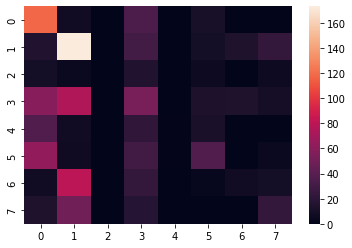

KNN Accuracy Score:  0.30483592400690845
[[ 86  18   3  15   6  30   4  10]
 [ 24 144   6  30   3  20  23  15]
 [ 11  10   3   3   1   5   2   6]
 [ 42  78   6  42   7  23  10  16]
 [ 29  14   2   8   7  16   1   2]
 [ 45  11   4  15  15  45   4   3]
 [ 14  62   1  26   4   3  16   5]
 [ 18  50   3   8   2   8   5  10]]
              precision    recall  f1-score   support

  aggressive       0.32      0.50      0.39       172
        calm       0.37      0.54      0.44       265
       chill       0.11      0.07      0.09        41
        dark       0.29      0.19      0.23       224
   energetic       0.16      0.09      0.11        79
       happy       0.30      0.32      0.31       142
    relaxing       0.25      0.12      0.16       131
         sad       0.15      0.10      0.12       104

    accuracy                           0.30      1158
   macro avg       0.24      0.24      0.23      1158
weighted avg       0.28      0.30      0.28      1158



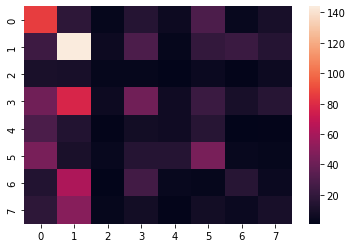

Gaussian NB Accuracy Score:  0.3531951640759931
[[95  0 10  0 19 46  2  0]
 [ 3 85  5  3  5 17 68 79]
 [ 5  0  9  0  0 14  0 13]
 [13 36  4  4  5 60 53 49]
 [11  0  3  3  9 44  6  3]
 [12  0  6  2  7 97  1 17]
 [ 2 16  1  5  1  5 50 51]
 [ 2  1  2  2  1 15 21 60]]
              precision    recall  f1-score   support

  aggressive       0.66      0.55      0.60       172
        calm       0.62      0.32      0.42       265
       chill       0.23      0.22      0.22        41
        dark       0.21      0.02      0.03       224
   energetic       0.19      0.11      0.14        79
       happy       0.33      0.68      0.44       142
    relaxing       0.25      0.38      0.30       131
         sad       0.22      0.58      0.32       104

    accuracy                           0.35      1158
   macro avg       0.34      0.36      0.31      1158
weighted avg       0.39      0.35      0.33      1158



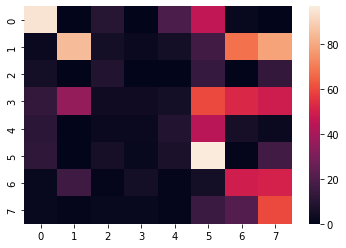

Support Vector Classifier Accuracy Score:  0.2970639032815199
[[156  16   0   0   0   0   0   0]
 [ 77 188   0   0   0   0   0   0]
 [ 26  15   0   0   0   0   0   0]
 [105 119   0   0   0   0   0   0]
 [ 64  15   0   0   0   0   0   0]
 [128  14   0   0   0   0   0   0]
 [ 39  92   0   0   0   0   0   0]
 [ 53  51   0   0   0   0   0   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  aggressive       0.24      0.91      0.38       172
        calm       0.37      0.71      0.49       265
       chill       0.00      0.00      0.00        41
        dark       0.00      0.00      0.00       224
   energetic       0.00      0.00      0.00        79
       happy       0.00      0.00      0.00       142
    relaxing       0.00      0.00      0.00       131
         sad       0.00      0.00      0.00       104

    accuracy                           0.30      1158
   macro avg       0.08      0.20      0.11      1158
weighted avg       0.12      0.30      0.17      1158



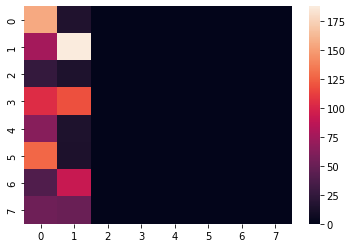

Decision Tree Classifier Accuracy Score:  0.32469775474956825
[[ 85   4  11  16  25  26   2   3]
 [  2 124   6  31   6  10  51  35]
 [  8   2   1   9   1   7   2  11]
 [ 15  53   7  55  21  26  34  13]
 [ 21   6   3  12  19  12   2   4]
 [ 22  13  11  22  24  36   6   8]
 [  2  49   4  24   1   2  35  14]
 [  1  34   7  11   2   6  22  21]]
              precision    recall  f1-score   support

  aggressive       0.54      0.49      0.52       172
        calm       0.44      0.47      0.45       265
       chill       0.02      0.02      0.02        41
        dark       0.31      0.25      0.27       224
   energetic       0.19      0.24      0.21        79
       happy       0.29      0.25      0.27       142
    relaxing       0.23      0.27      0.25       131
         sad       0.19      0.20      0.20       104

    accuracy                           0.32      1158
   macro avg       0.28      0.27      0.27      1158
weighted avg       0.33      0.32      0.33      1158



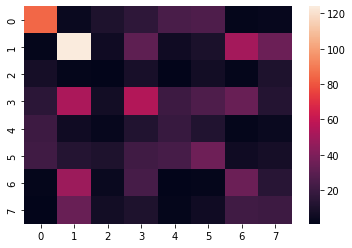

Random Forest Classifier Accuracy Score:  0.45682210708117443
[[139   0   7   3  13  10   0   0]
 [  2 164   2  23   1  12  24  37]
 [  9   3   0   4   0  12   2  11]
 [ 20  57   4  68  10  35  17  13]
 [ 27   6   0   7  12  26   0   1]
 [ 20   9   3   7  13  84   2   4]
 [  2  50   1  21   2   2  33  20]
 [  3  44   1   8   1   7  11  29]]
              precision    recall  f1-score   support

  aggressive       0.63      0.81      0.71       172
        calm       0.49      0.62      0.55       265
       chill       0.00      0.00      0.00        41
        dark       0.48      0.30      0.37       224
   energetic       0.23      0.15      0.18        79
       happy       0.45      0.59      0.51       142
    relaxing       0.37      0.25      0.30       131
         sad       0.25      0.28      0.26       104

    accuracy                           0.46      1158
   macro avg       0.36      0.38      0.36      1158
weighted avg       0.43      0.46      0.44      1158



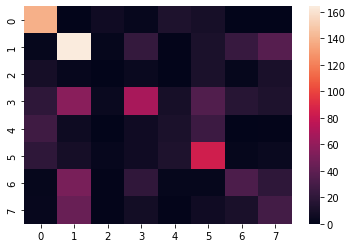

In [45]:
# Baseline Models: BEFORE SMOTE RESAMPLING

# Run a grid search to get the best value for n_neighbors for KNN
n_neighbors=KNearnestNeighboursGRIDSearch(audio_features,audio_labels)

LogRegression(X_train, X_test, y_train, y_test)
KNN(X_train, X_test, y_train, y_test,n_neighbors)
GaussNB(X_train, X_test, y_train, y_test)
SupportVectorClassifier(X_train, X_test, y_train, y_test)
DecisionTree(X_train, X_test, y_train, y_test)
RandomForest(X_train, X_test, y_train, y_test)

### **Running Models - After ReSampling (i.e. with SMOTE)**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Accuracy Score:  0.3031854379977247
[[116   2  17   1  68  15   7   5]
 [ 11  85   6   3  10   2  40  38]
 [ 20   6  62   8  81  28   6  34]
 [ 36  46   8   6  33   7  42  31]
 [ 68   4   9  11  96  24   6   7]
 [ 53   2  19   6  80  38   0  12]
 [  5  75  16   5  19   4  45  55]
 [ 14  28  13   1  26  12  40  85]]
              precision    recall  f1-score   support

  aggressive       0.36      0.50      0.42       231
        calm       0.34      0.44      0.38       195
       chill       0.41      0.25      0.31       245
        dark       0.15      0.03      0.05       209
   energetic       0.23      0.43      0.30       225
       happy       0.29      0.18      0.22       210
    relaxing       0.24      0.20      0.22       224
         sad       0.32      0.39      0.35       219

    accuracy                           0.30      1758
   macro avg       0.29      0.30      0.28      1758
weighted avg       0.30      0.30      0.28      1758



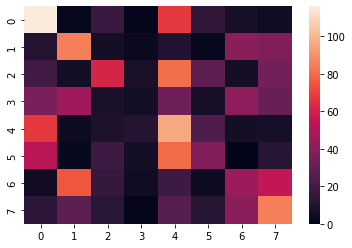

KNN Accuracy Score:  0.6075085324232082
[[137  10  21   9  12  22   9  11]
 [  7  72  13  29   7   7  36  24]
 [ 13  10 185   4   8  13   3   9]
 [  9  28  14  90  18  17  20  13]
 [ 18   1   6   6 176  11   4   3]
 [ 18   4   9   9  18 140   7   5]
 [  9  32  15  16   4   5 130  13]
 [  8  24  11   6  10   6  16 138]]
              precision    recall  f1-score   support

  aggressive       0.63      0.59      0.61       231
        calm       0.40      0.37      0.38       195
       chill       0.68      0.76      0.71       245
        dark       0.53      0.43      0.48       209
   energetic       0.70      0.78      0.74       225
       happy       0.63      0.67      0.65       210
    relaxing       0.58      0.58      0.58       224
         sad       0.64      0.63      0.63       219

    accuracy                           0.61      1758
   macro avg       0.60      0.60      0.60      1758
weighted avg       0.60      0.61      0.60      1758



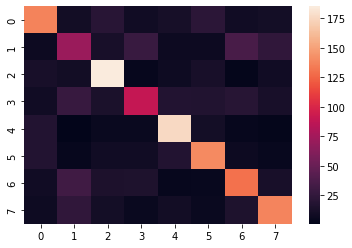

Gaussian NB Accuracy Score:  0.40159271899886234
[[111   0  26   2  31  55   2   4]
 [  3  44  10   2   2   6  66  62]
 [ 11   1 148   2   7  46   0  30]
 [ 15  18  23   6   6  36  62  43]
 [ 27   2  17   6  46 107  10  10]
 [ 18   0  42   3   9 126   0  12]
 [  0  17  14   7   4   6  91  85]
 [  1   3  41   3   2  10  25 134]]
              precision    recall  f1-score   support

  aggressive       0.60      0.48      0.53       231
        calm       0.52      0.23      0.31       195
       chill       0.46      0.60      0.52       245
        dark       0.19      0.03      0.05       209
   energetic       0.43      0.20      0.28       225
       happy       0.32      0.60      0.42       210
    relaxing       0.36      0.41      0.38       224
         sad       0.35      0.61      0.45       219

    accuracy                           0.40      1758
   macro avg       0.40      0.40      0.37      1758
weighted avg       0.41      0.40      0.37      1758



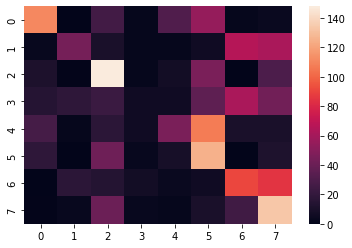

Support Vector Classifier Accuracy Score:  0.23378839590443687
[[ 74   0   4   0   0 134   0  19]
 [ 20  61   7   0   0  36  30  41]
 [ 56   0   6   0   1 127   2  53]
 [ 13  40  15   0   0  79  25  37]
 [ 35   0   2   0   0 154   0  34]
 [ 25   0   4   0   2 168   0  11]
 [ 28  63  21   0   1  53  16  42]
 [ 34   1  14   0   0  81   3  86]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  aggressive       0.26      0.32      0.29       231
        calm       0.37      0.31      0.34       195
       chill       0.08      0.02      0.04       245
        dark       0.00      0.00      0.00       209
   energetic       0.00      0.00      0.00       225
       happy       0.20      0.80      0.32       210
    relaxing       0.21      0.07      0.11       224
         sad       0.27      0.39      0.32       219

    accuracy                           0.23      1758
   macro avg       0.17      0.24      0.18      1758
weighted avg       0.17      0.23      0.17      1758



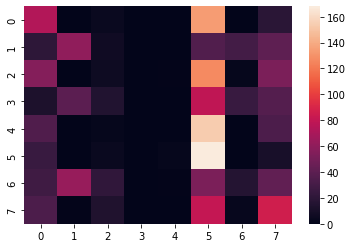

Decision Tree Classifier Accuracy Score:  0.5005688282138794
[[127   7  15   8  38  23   1  12]
 [  5  86  10  31   3   7  24  29]
 [ 12   5 173   5   4  26   6  14]
 [ 20  35  10  77  17   8  24  18]
 [ 30   3  12  13 127  34   5   1]
 [ 27   9  19  21  32  95   0   7]
 [  3  46   7  28   9   3 103  25]
 [  4  42  26  16   8   4  27  92]]
              precision    recall  f1-score   support

  aggressive       0.56      0.55      0.55       231
        calm       0.37      0.44      0.40       195
       chill       0.64      0.71      0.67       245
        dark       0.39      0.37      0.38       209
   energetic       0.53      0.56      0.55       225
       happy       0.47      0.45      0.46       210
    relaxing       0.54      0.46      0.50       224
         sad       0.46      0.42      0.44       219

    accuracy                           0.50      1758
   macro avg       0.50      0.50      0.49      1758
weighted avg       0.50      0.50      0.50      1758



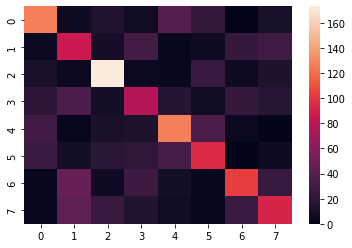

Random Forest Classifier Accuracy Score:  0.6626848691695109
[[179   0  11   2  24  12   0   3]
 [  3  87   9  14   5   8  27  42]
 [  4   1 225   0   2   6   0   7]
 [ 16  23  11  80  21  21  17  20]
 [ 19   0  10   3 174  16   1   2]
 [ 20   2  12   2  26 137   4   7]
 [  0  23   4  11   6   3 132  45]
 [  1  21  18   4   4   3  17 151]]
              precision    recall  f1-score   support

  aggressive       0.74      0.77      0.76       231
        calm       0.55      0.45      0.49       195
       chill       0.75      0.92      0.83       245
        dark       0.69      0.38      0.49       209
   energetic       0.66      0.77      0.71       225
       happy       0.67      0.65      0.66       210
    relaxing       0.67      0.59      0.63       224
         sad       0.55      0.69      0.61       219

    accuracy                           0.66      1758
   macro avg       0.66      0.65      0.65      1758
weighted avg       0.66      0.66      0.65      1758



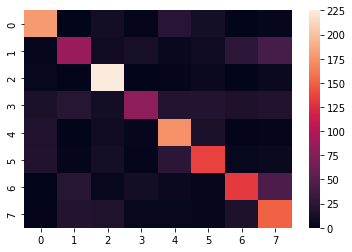

In [47]:
# Baseline Models: AFTER SMOTE RESAMPLING

# Run a grid search to get the best value for n_neighbors for KNN
n_neighbors=KNearnestNeighboursGRIDSearch(X_res,y_res)

LogRegression(X_train_res, X_test_res, y_train_res, y_test_res)
KNN(X_train_res, X_test_res, y_train_res, y_test_res,n_neighbors)
GaussNB(X_train_res, X_test_res, y_train_res, y_test_res)
SupportVectorClassifier(X_train_res, X_test_res, y_train_res, y_test_res)
DecisionTree(X_train_res, X_test_res, y_train_res, y_test_res)
RandomForest(X_train_res, X_test_res, y_train_res, y_test_res)

### **Comparison of Model results Before and After Resampling using SMOTE**



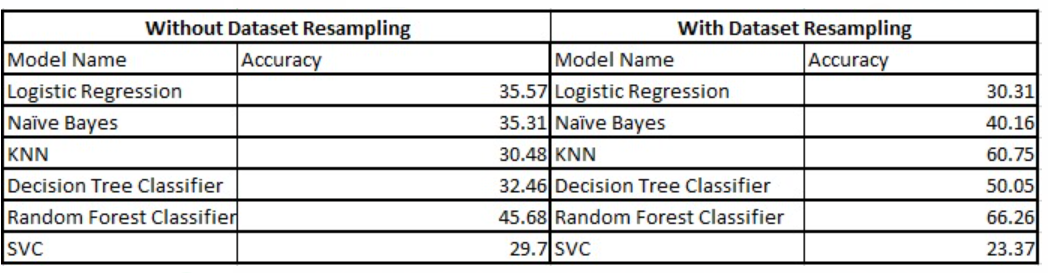

## **Scaling of the Data**

In [48]:
# Using Sampled features and labels generated after SMOTE
audio_features = X_res
audio_labels = y_res
scaler = StandardScaler()
scaler.fit(audio_features)
scaled_data = scaler.transform(audio_features)
audio_features_scaled = scaled_data
X_train, X_test, y_train, y_test = train_test_split(audio_features_scaled, audio_labels, test_size=0.3)

### **Running Models**

Logistic Regression Accuracy Score:  0.4522184300341297
[[154   0  25   5  28  19   2   2]
 [  2  72   7  13   4   6  37  61]
 [ 16   3 122  10   9  41   4  25]
 [ 15  49  14  18  14  25  46  29]
 [ 28   0  16  10  92  64   3   2]
 [ 32   1  39   9  30 106   0   5]
 [  1  28  13  11   6   3  81  67]
 [  1   6  30  14   4   7  22 150]]
              precision    recall  f1-score   support

  aggressive       0.62      0.66      0.64       235
        calm       0.45      0.36      0.40       202
       chill       0.46      0.53      0.49       230
        dark       0.20      0.09      0.12       210
   energetic       0.49      0.43      0.46       215
       happy       0.39      0.48      0.43       222
    relaxing       0.42      0.39      0.40       210
         sad       0.44      0.64      0.52       234

    accuracy                           0.45      1758
   macro avg       0.43      0.45      0.43      1758
weighted avg       0.44      0.45      0.44      1758



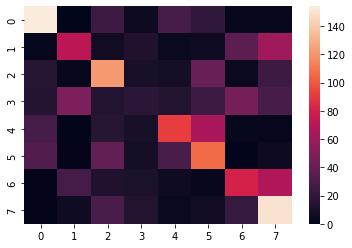

KNN Accuracy Score:  0.6450511945392492
[[163   2  10  14  22  19   1   4]
 [  0  73  10  26   1   6  45  41]
 [  3   0 210   3   0   7   2   5]
 [  6  26   9  86  15  18  24  26]
 [  9   1   5  14 163  19   2   2]
 [ 15   5  14   5  24 152   1   6]
 [  1  27   4  11   2   0 133  32]
 [  2  29   4  10   2   8  25 154]]
              precision    recall  f1-score   support

  aggressive       0.82      0.69      0.75       235
        calm       0.45      0.36      0.40       202
       chill       0.79      0.91      0.85       230
        dark       0.51      0.41      0.45       210
   energetic       0.71      0.76      0.73       215
       happy       0.66      0.68      0.67       222
    relaxing       0.57      0.63      0.60       210
         sad       0.57      0.66      0.61       234

    accuracy                           0.65      1758
   macro avg       0.64      0.64      0.63      1758
weighted avg       0.64      0.65      0.64      1758



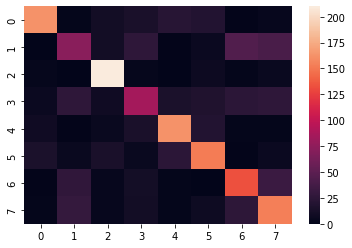

Gaussian NB Accuracy Score:  0.4055745164960182
[[118   0  26   2  23  60   1   5]
 [  2  43  10   2   2   5  77  61]
 [  7   1 121   0  10  53   3  35]
 [ 15  15  14   2   6  35  77  46]
 [ 26   2  18   8  52  97   5   7]
 [ 20   0  40   0  13 144   0   5]
 [  3  15  22   2   3   2  88  75]
 [  2   1  40   2   2  14  28 145]]
              precision    recall  f1-score   support

  aggressive       0.61      0.50      0.55       235
        calm       0.56      0.21      0.31       202
       chill       0.42      0.53      0.46       230
        dark       0.11      0.01      0.02       210
   energetic       0.47      0.24      0.32       215
       happy       0.35      0.65      0.46       222
    relaxing       0.32      0.42      0.36       210
         sad       0.38      0.62      0.47       234

    accuracy                           0.41      1758
   macro avg       0.40      0.40      0.37      1758
weighted avg       0.40      0.41      0.37      1758



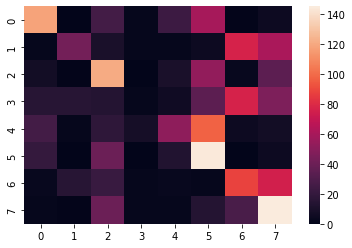

Support Vector Classifier Accuracy Score:  0.515358361774744
[[170   0  11   2  24  25   2   1]
 [  1  64   9  24   3   6  28  67]
 [ 12   2 158   4   4  27   2  21]
 [ 17  24  10  44  17  25  36  37]
 [ 25   0  20   4 109  55   1   1]
 [ 28   0  34   0  22 132   3   3]
 [  1  19  20   5   6   2  75  82]
 [  1   4  37   5   4   6  23 154]]
              precision    recall  f1-score   support

  aggressive       0.67      0.72      0.69       235
        calm       0.57      0.32      0.41       202
       chill       0.53      0.69      0.60       230
        dark       0.50      0.21      0.30       210
   energetic       0.58      0.51      0.54       215
       happy       0.47      0.59      0.53       222
    relaxing       0.44      0.36      0.39       210
         sad       0.42      0.66      0.51       234

    accuracy                           0.52      1758
   macro avg       0.52      0.51      0.50      1758
weighted avg       0.52      0.52      0.50      1758



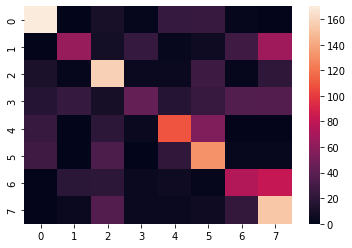

Decision Tree Classifier Accuracy Score:  0.5096700796359499
[[146   3   9  13  28  26   2   8]
 [  3  93   8  27   6   6  35  24]
 [  5  15 157  12  11  10   5  15]
 [ 10  41   7  68  15  25  24  20]
 [ 28   6  14  14 110  40   1   2]
 [ 19   8  17  13  32 120   3  10]
 [  4  42   5  23   4   6  94  32]
 [  5  32  16  14   4  16  39 108]]
              precision    recall  f1-score   support

  aggressive       0.66      0.62      0.64       235
        calm       0.39      0.46      0.42       202
       chill       0.67      0.68      0.68       230
        dark       0.37      0.32      0.35       210
   energetic       0.52      0.51      0.52       215
       happy       0.48      0.54      0.51       222
    relaxing       0.46      0.45      0.46       210
         sad       0.49      0.46      0.48       234

    accuracy                           0.51      1758
   macro avg       0.51      0.51      0.51      1758
weighted avg       0.51      0.51      0.51      1758



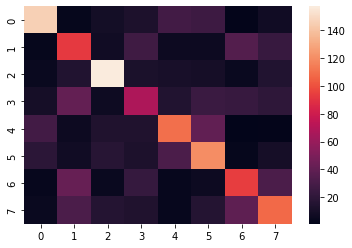

Random Forest Classifier Accuracy Score:  0.6609783845278726
[[189   0  11   0  12  21   2   0]
 [  1  92   2  15   2  11  33  46]
 [  4   1 201   0   2  10   5   7]
 [ 15  22  11  72  13  23  29  25]
 [ 20   0  10   1 165  18   1   0]
 [ 19   2  17   2  22 153   2   5]
 [  1  22   5  10   4   1 130  37]
 [  1   8  21   5   4   2  33 160]]
              precision    recall  f1-score   support

  aggressive       0.76      0.80      0.78       235
        calm       0.63      0.46      0.53       202
       chill       0.72      0.87      0.79       230
        dark       0.69      0.34      0.46       210
   energetic       0.74      0.77      0.75       215
       happy       0.64      0.69      0.66       222
    relaxing       0.55      0.62      0.58       210
         sad       0.57      0.68      0.62       234

    accuracy                           0.66      1758
   macro avg       0.66      0.65      0.65      1758
weighted avg       0.66      0.66      0.65      1758



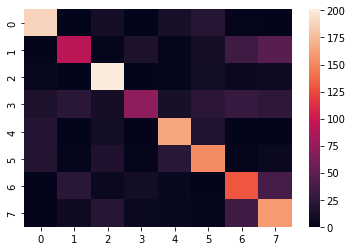

In [49]:
# Baseline Models: Need to run this for every dataset

# Run a grid search to get the best value for n_neighbors for KNN
n_neighbors=KNearnestNeighboursGRIDSearch(audio_features,audio_labels)

LogRegression(X_train, X_test, y_train, y_test)
KNN(X_train, X_test, y_train, y_test,n_neighbors)
GaussNB(X_train, X_test, y_train, y_test)
SupportVectorClassifier(X_train, X_test, y_train, y_test)
DecisionTree(X_train, X_test, y_train, y_test)
RandomForest(X_train, X_test, y_train, y_test)

### **Model results: Before Sampling Vs After Resampling using SMOTE Vs SMOTE ReSampling + Standard Scaling**

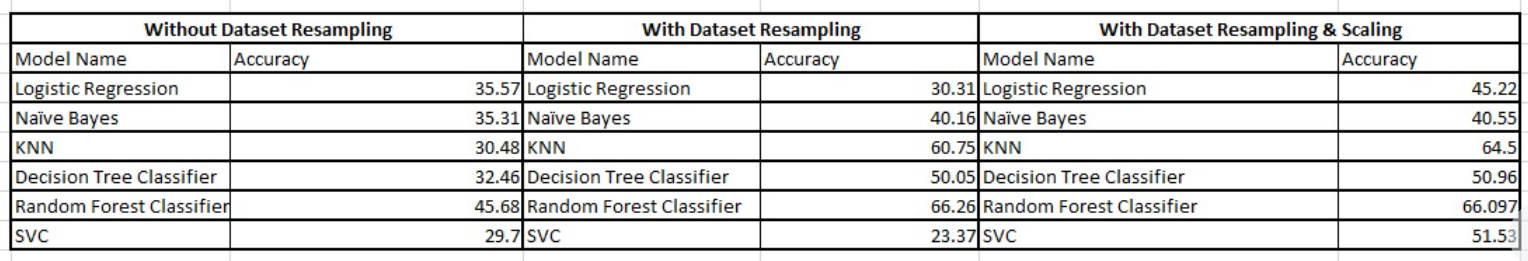

## **Overfitting of the Model**

### **KNN Model : Overfitting**

>1, train: 0.983, test: 0.645
>10, train: 0.614, test: 0.511
>20, train: 0.548, test: 0.482
>30, train: 0.508, test: 0.470
>40, train: 0.480, test: 0.454
>50, train: 0.464, test: 0.445


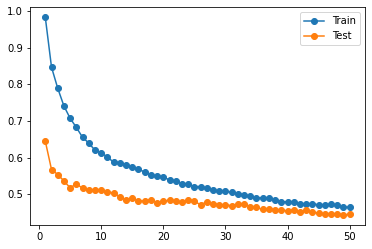

In [50]:
from sklearn.metrics import accuracy_score
train_accuracy_scores = list()
test_accuracy_scores = list()
neighbours = [i for i in range(1, 51)]
for neighbour_count in neighbours:
	KNN = KNeighborsClassifier(n_neighbors = neighbour_count)
	KNN.fit(X_train, y_train)
	train_predictions = KNN.predict(X_train)
	train_accuracy = accuracy_score(y_train, train_predictions)
	train_accuracy_scores.append(train_accuracy)
	test_predictions = KNN.predict(X_test)
	test_accuracy = accuracy_score(y_test, test_predictions)
	test_accuracy_scores.append(test_accuracy)
	if neighbour_count % 10 == 0 or neighbour_count==1:
		print('>%d, train: %.3f, test: %.3f' % (neighbour_count, train_accuracy, test_accuracy))
plt.plot(neighbours, train_accuracy_scores, '-o', label='Train')
plt.plot(neighbours, test_accuracy_scores, '-o', label='Test')
plt.legend()
plt.show()

### **Decision Tree Model : Overfitting**

>1, train: 0.223, test: 0.221
>10, train: 0.719, test: 0.473
>20, train: 0.980, test: 0.513
>30, train: 0.983, test: 0.516
>40, train: 0.983, test: 0.516
>50, train: 0.983, test: 0.519


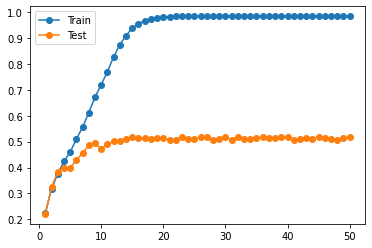

In [51]:
train_accuracy_scores = list()
test_accuracy_scores = list()
depth_values = [i for i in range(1, 51)]
for depth_value in depth_values:
	DTC = DecisionTreeClassifier(max_depth=depth_value)
	DTC.fit(X_train, y_train)
	train_predictions = DTC.predict(X_train)
	train_accuracy = accuracy_score(y_train, train_predictions)
	train_accuracy_scores.append(train_accuracy)
	test_predictions = DTC.predict(X_test)
	test_accuracy = accuracy_score(y_test, test_predictions)
	test_accuracy_scores.append(test_accuracy)
	if depth_value % 10 == 0 or depth_value==1:
		print('>%d, train: %.3f, test: %.3f' % (depth_value, train_accuracy, test_accuracy))
plt.plot(depth_values, train_accuracy_scores, '-o', label='Train')
plt.plot(depth_values, test_accuracy_scores, '-o', label='Test')
plt.legend()
plt.show()

### **RFC Model : Overfitting (Using NEstimator hyperparameter)**

>1, train: 0.782, test: 0.458
>10, train: 0.975, test: 0.580
>20, train: 0.982, test: 0.630
>30, train: 0.983, test: 0.638
>40, train: 0.983, test: 0.649
>50, train: 0.983, test: 0.646
>60, train: 0.983, test: 0.659
>70, train: 0.983, test: 0.662
>80, train: 0.983, test: 0.648
>90, train: 0.983, test: 0.652
>100, train: 0.983, test: 0.657


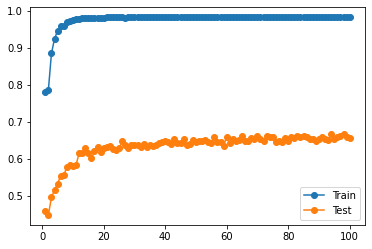

In [53]:
train_accuracy_scores = list()
test_accuracy_scores = list()
estimator_values = [i for i in range(1, 101)]
for estimator_value in estimator_values:
	RFC = RandomForestClassifier(n_estimators=estimator_value)
	RFC.fit(X_train, y_train)
	train_predictions = RFC.predict(X_train)
	train_accuracy = accuracy_score(y_train, train_predictions)
	train_accuracy_scores.append(train_accuracy)
	test_predictions = RFC.predict(X_test)
	test_accuracy = accuracy_score(y_test, test_predictions)
	test_accuracy_scores.append(test_accuracy)
	if estimator_value % 10 == 0 or estimator_value==1:
		print('>%d, train: %.3f, test: %.3f' % (estimator_value, train_accuracy, test_accuracy))
plt.plot(estimator_values, train_accuracy_scores, '-o', label='Train')
plt.plot(estimator_values, test_accuracy_scores, '-o', label='Test')
plt.legend()
plt.show()

### **RFC Model : Overfitting (Using MAX Depth hyperparameter)**

>1, train: 0.312, test: 0.296
>10, train: 0.874, test: 0.590
>20, train: 0.983, test: 0.667
>30, train: 0.983, test: 0.655
>40, train: 0.983, test: 0.667
>50, train: 0.983, test: 0.662
>60, train: 0.983, test: 0.646
>70, train: 0.983, test: 0.646
>80, train: 0.983, test: 0.667
>90, train: 0.983, test: 0.655
>100, train: 0.983, test: 0.652


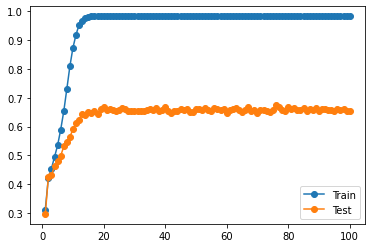

In [55]:
train_accuracy_scores = list()
test_accuracy_scores = list()
depth_values = [i for i in range(1, 101)]
for depth_value in depth_values:
	RFC = RandomForestClassifier(max_depth=depth_value)
	RFC.fit(X_train, y_train)
	train_predictions = RFC.predict(X_train)
	train_accuracy = accuracy_score(y_train, train_predictions)
	train_accuracy_scores.append(train_accuracy)
	test_predictions = RFC.predict(X_test)
	test_accuracy = accuracy_score(y_test, test_predictions)
	test_accuracy_scores.append(test_accuracy)
	if depth_value % 10 == 0 or depth_value==1:
		print('>%d, train: %.3f, test: %.3f' % (depth_value, train_accuracy, test_accuracy))
plt.plot(depth_values, train_accuracy_scores, '-o', label='Train')
plt.plot(depth_values, test_accuracy_scores, '-o', label='Test')
plt.legend()
plt.show()

## **SYNTHETIC DATASET**

We have prepared a different ipynb script that shows how th esynthetic dataset is being generated for our model.

## **NEXT STEPS**

We have tested several models like SVC, KNN, RFC, DecisionTree, GNB on this dataset to understand the underlying patterns and structure of the dataset. As a part of next steps we plan to perform below steps - 

1. Improve RFC parameters and test RFC model
2. Improve SVC parameters and test SVC model
3. Implement PCA and test the model
4. Analytize and compare these different implemntations
5. Implement Artificial Neural Network and analye the performance of the ANN vs rest of the models.


## **Features Definitions from Spotify Webpage.**

The below definitions of different audio features have been copy/paste from Spotify Webpage.


**Spotify Audio Features:**
Spotify uses a series of different features to classify tracks. I copy/paste the information from the Spotify Webpage.

**Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**Instrumentalness:** Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.
Loudness: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**Speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**Tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.